In [1]:
!pip install torch==2.3.0 torchvision
!pip install opencv-python supervision matplotlib

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7

In [46]:
!which nvcc

/usr/local/cuda/bin/nvcc


In [47]:
!export CUDA_HOME=/usr/local/cuda/bin/nvcc


In [2]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
!git clone https://github.com/facebookresearch/sam2.git


%cd GroundingDINO
!pip install -e .

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Total 463 (delta 0), reused 0 (delta 0), pack-reused 463 (from 1)
Receiving objects: 100% (463/463), 12.91 MiB | 36.11 MiB/s, done.
Resolving deltas: 100% (221/221), done.
Cloning into 'sam2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 34.53 MiB/s, done.
Resolving deltas: 100% (380/380), done.
/content/GroundingDINO
Obtaining file:///content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 9.3 MB/s eta 0:00:00
  Running setup.py develop for groundingdino


In [3]:
!pip install -e /content/sam2

Obtaining file:///content/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using ca

In [13]:
!wget -O groundingdino_swint_ogc.pth https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
!wget -O sam2_hiera_large.pt https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt


--2025-10-04 12:46:25--  https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/611591640/f221e500-c2fc-4fd3-b84e-8ad92a6923f3?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-04T13%3A42%3A33Z&rscd=attachment%3B+filename%3Dgroundingdino_swint_ogc.pth&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-04T12%3A41%3A47Z&ske=2025-10-04T13%3A42%3A33Z&sks=b&skv=2018-11-09&sig=F%2FzhnG9WvASVop6f5XDn8AqG3NaoWXUbS3FgI1phRjI%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1OTU4NTU4NiwibmJmIjoxNzU5NTgxOTg2LCJwYX

In [55]:
from google.colab import files
uploaded = files.upload()

IMAGE_PATH = list(uploaded.keys())[0]

from PIL import Image
img = Image.open(IMAGE_PATH).convert("RGB")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


IndexError: list index out of range

In [6]:
%cd GroundingDINO
from groundingdino.util.inference import load_model, predict

[Errno 2] No such file or directory: 'GroundingDINO'
/content/GroundingDINO


In [7]:
%cd ..

/content


In [11]:
from PIL import Image
import torch
import torchvision.transforms as T

def safe_predict(model, image, caption, box_threshold, text_threshold, device, remove_combined=True):
    if isinstance(image, Image.Image):
        transform = T.Compose([
            T.Resize((800, 800)),
            T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        image = transform(image).to(device)
    if isinstance(image, torch.Tensor):
        image = image.to(device)
    return predict(
        model=model,
        image=image,
        caption=caption,
        box_threshold=box_threshold,
        text_threshold=text_threshold,
        device=device,
        remove_combined=remove_combined
    )


In [14]:
import torch
from PIL import Image
import cv2
import torchvision.transforms as T
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

transform = T.Compose([
    T.Resize((800, 800)),
    T.ToTensor()
])
GROUNDING_DINO_CONFIG = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
GROUNDING_DINO_CHECKPOINT = "groundingdino_swint_ogc.pth"
dino_model = load_model(GROUNDING_DINO_CONFIG, GROUNDING_DINO_CHECKPOINT).to(DEVICE)

image_tensor = transform(img).unsqueeze(0).to(DEVICE)
prompt = input("Enter DINO detection prompt: ")
print(f"Using prompt: {prompt}")
result = safe_predict(
    model=dino_model,
    image=img,
    caption=prompt,
    box_threshold=0.35,
    text_threshold=0.25,
    device="cpu"
)
print(f"Returned: {type(result)}\nLength: {len(result)}\nContent: {result}")



final text_encoder_type: bert-base-uncased


Returned: <class 'tuple'>
Length: 3
Content: (tensor([[0.3257, 0.7709, 0.2056, 0.1805],
        [0.1702, 0.5178, 0.1612, 0.1473],
        [0.8322, 0.6567, 0.1936, 0.1671],
        [0.5809, 0.7137, 0.2121, 0.1716],
        [0.3475, 0.5638, 0.1712, 0.1521],
        [0.4934, 0.3828, 0.1460, 0.1011],
        [0.7544, 0.4797, 0.1639, 0.1197],
        [0.3588, 0.4343, 0.1506, 0.1045],
        [0.6409, 0.5176, 0.1855, 0.1500],
        [0.4739, 0.2990, 0.1329, 0.0951],
        [0.5013, 0.1741, 0.1124, 0.0805],
        [0.5306, 0.0984, 0.1123, 0.0938],
        [0.7542, 0.3744, 0.1473, 0.1113],
        [0.6727, 0.1657, 0.1184, 0.1265],
        [0.6201, 0.2868, 0.1099, 0.1135],
        [0.4330, 0.2486, 0.1650, 0.0846],
        [0.7140, 0.3346, 0.1526, 0.1029],
        [0.4152, 0.1109, 0.0698, 0.0413],
        [0.3614, 0.3791, 0.0896, 0.0522],
        [0.3265, 0.2076, 0.0954, 0.0759]]), tensor([0.7403, 0.7074, 0.7077, 0.7134, 0.6478, 0.5240, 0.5440, 0.4504, 0.5978,
        0.4785, 0.4499, 0.4497, 

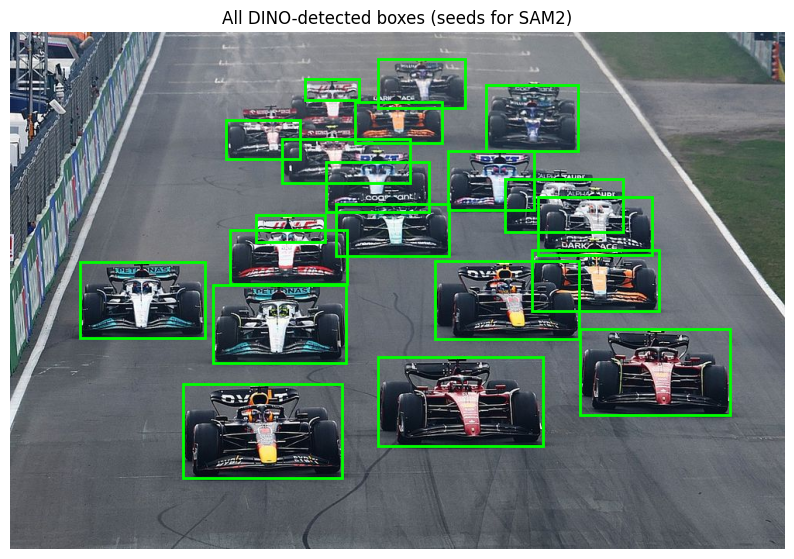

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def dino_box_to_xyxy(box, image_size):
    cx, cy, w, h = [b.item() for b in box]
    W, H = image_size
    xmin = (cx - w/2) * W
    ymin = (cy - h/2) * H
    xmax = (cx + w/2) * W
    ymax = (cy + h/2) * H
    return [xmin, ymin, xmax, ymax]

all_sam_boxes = np.array([dino_box_to_xyxy(box, img.size) for box in result[0]])

plt.figure(figsize=(10, 10))
plt.imshow(np.array(img))
for bx in all_sam_boxes:
    x0, y0, x1, y1 = bx
    plt.gca().add_patch(
        plt.Rectangle((x0, y0), x1-x0, y1-y0, edgecolor='lime', linewidth=2, fill=False)
    )
plt.title("All DINO-detected boxes (seeds for SAM2)")
plt.axis('off')
plt.show()



In [16]:
%cd /content

/content


In [17]:
import_guard_file = "/content/sam2/sam2/build_sam.py"

with open(import_guard_file, 'r') as f:
    content = f.read()

patched_content = content.replace(
    'if os.path.isdir(os.path.join(sam2.__path__[0], "sam2")):',
    'if False:  # PATCHED - disabled directory check'
)

with open(import_guard_file, 'w') as f:
    f.write(patched_content)

print("Patched build_sam.py - import guard disabled")


Patched build_sam.py - import guard disabled


In [18]:
import sys
modules_to_remove = [k for k in sys.modules.keys() if k.startswith('sam2')]
for mod in modules_to_remove:
    del sys.modules[mod]

sys.path.insert(0, '/content/sam2')


In [19]:
import sys
import os

sys.path.insert(0, '/content/sam2/sam2')

os.chdir('/content/sam2/sam2')

from build_sam import build_sam2
from sam2_image_predictor import SAM2ImagePredictor


In [21]:
SAM2_CONFIG = "/configs/sam2/sam2_hiera_l.yaml"
SAM2_WEIGHTS = "/content/sam2_hiera_large.pt"
DEVICE = "cpu"
sam2_model = build_sam2(SAM2_CONFIG, ckpt_path=SAM2_WEIGHTS, device=DEVICE)
predictor = SAM2ImagePredictor(sam2_model)


In [36]:
img_np = np.array(img)
predictor.set_image(img_np)

masks, scores, logits = predictor.predict(
    box=all_sam_boxes,
    multimask_output= False
)

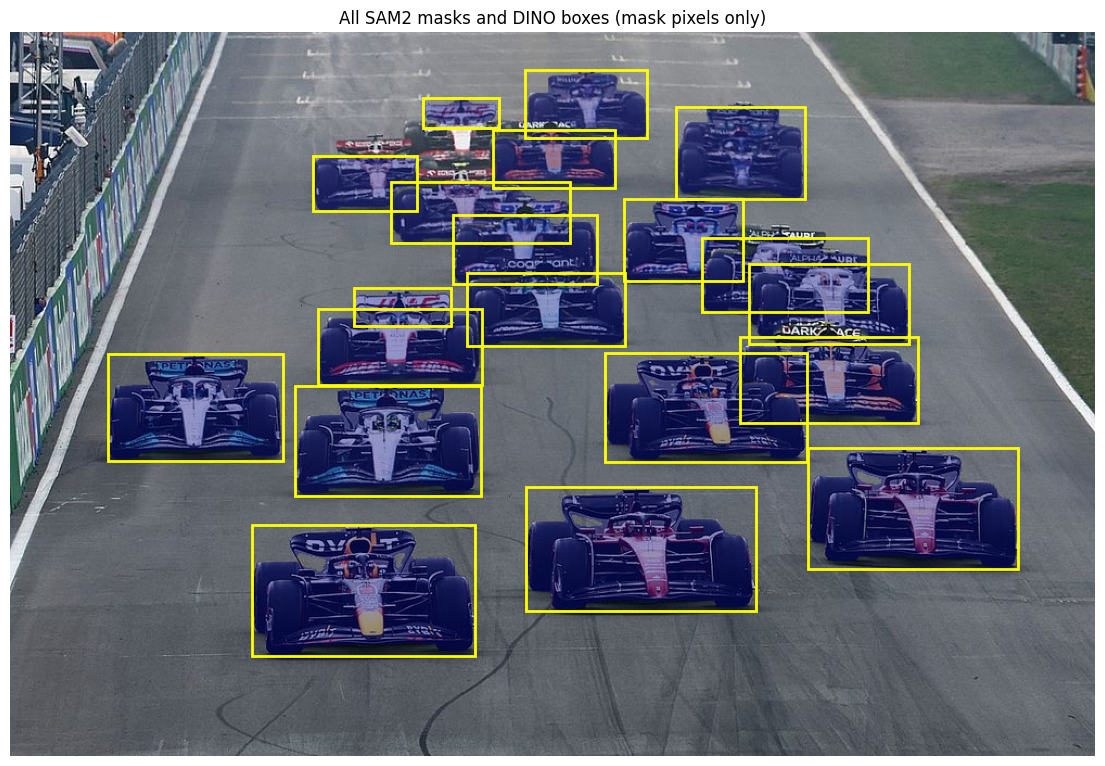

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10))
plt.imshow(np.array(img))

for i in range(len(masks)):
    mask_rgb = np.ma.masked_where(masks[i] == 0, masks[i])
    plt.imshow(mask_rgb.squeeze(), cmap='jet', alpha=0.4)

    x0, y0, x1, y1 = all_sam_boxes[i]
    plt.gca().add_patch(
        plt.Rectangle((x0, y0), x1-x0, y1-y0, edgecolor='yellow', linewidth=2, fill=False)
    )

plt.title("All SAM2 masks and DINO boxes (mask pixels only)")
plt.axis('off')
plt.show()
